In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# We can access the dataset through relative paths as such:
DAY_PATH = "./data/clear_images.npy"
NIGHT_PATH = "./data/night_images.npy"

import numpy as np

day_images = np.load(DAY_PATH)
night_images = np.load(NIGHT_PATH)

print("Day images shape:", day_images.shape)
print("Night images shape:", night_images.shape)

Day images shape: (5000, 224, 224, 3)
Night images shape: (5000, 224, 224, 3)


In [3]:
"""
Let's convert the images into a dataset
with the average HSV and RGB values of the images
"""

N = len(day_images) + len(night_images)
X_images = np.concatenate((day_images, night_images))
X_tabular = np.zeros((N, 6))
y_tabular = np.array([0]*len(day_images) + [1]*len(night_images))

for i in range(N):
    image = X_images[i]
    features = [np.mean(image[:,:,i]) for i in range(3)]
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    features += [np.mean(hsv_image[:,:,i]) for i in range(3)]
    
    X_tabular[i] = features

print(f"X_channels.shape = {X_tabular.shape}")
print(f"X_channels[0] = {X_tabular[0]}")
print(f"y_channels.shape = {y_tabular.shape}")
print(f"y_channels[0] = {y_tabular[0]}")


X_channels.shape = (10000, 6)
X_channels[0] = [109.51969069 109.19880022  96.6330118   68.09719786  64.02130501
 118.74093192]
y_channels.shape = (10000,)
y_channels[0] = 0


In [4]:
# Let's start by doing a train test split

X_train, X_test, y_train, y_test = train_test_split(X_tabular, y_tabular, test_size=0.2, random_state=42)

In [5]:
# Training

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

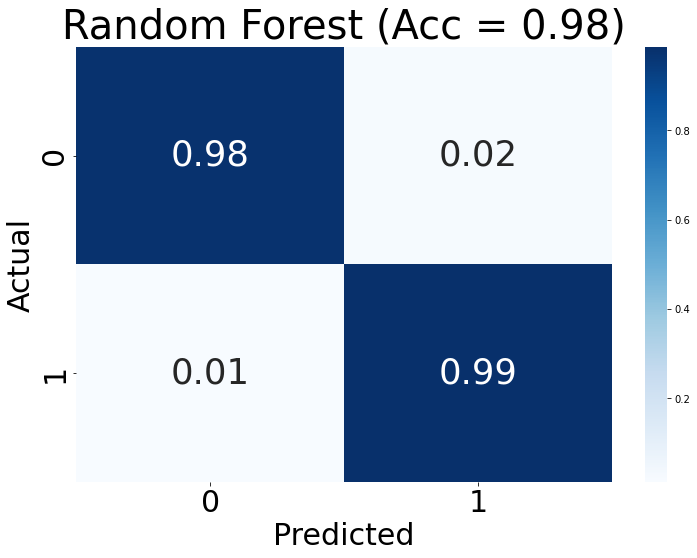

In [6]:
# Predict and Evaluate

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(12, 8))
plt.title("Random Forest (Acc = {:.2f})".format(accuracy), fontsize = 40)
cm = confusion_matrix(y_test, y_pred)
# Convert to percentages
cm_perc = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
# Plot
sns.heatmap(cm_perc, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 50 / np.sqrt(len(cm_perc))})
# Add x and y labels
plt.xlabel("Predicted", fontsize = 30)
plt.ylabel("Actual", fontsize = 30)
# Add x and y ticks
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

plt.show()